# Azure Text Analyticsを用いたエンティティリンキング

このノートブックでは、[Azure Text Analytics API](https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/)を用いて、エンティティリンキングをする方法を紹介します。

## 準備

### パッケージのインストール

In [2]:
!pip install requests==2.23.0 azure-cognitiveservices-language-textanalytics==0.2.0

     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 


### インポート

In [3]:
import pprint

import requests

### テキストのアップロード

まずはテキストをアップロードします。ノートブックと同じ階層にDataフォルダがあり、その下に`myarticle.txt`があるので、アップロードしましょう。Colabでない場合は、読み込むときに正しいパスを指定します。

In [4]:
from google.colab import files
uploaded = files.upload()

Saving myarticle.txt to myarticle.txt


### テキストの読み込み

In [5]:
with open("myarticle.txt", encoding="utf-8") as f:
    mytext = f.read()

## エンティティリンキング

では、エンティティリンキングをしてみましょう。作成済みのText Analyticsサービスのメニューから、発行されたAPIキーとエンドポイントのURLを確認し、以下のコードに貼り付けます。APIキーは外部に漏れないようにしてください。

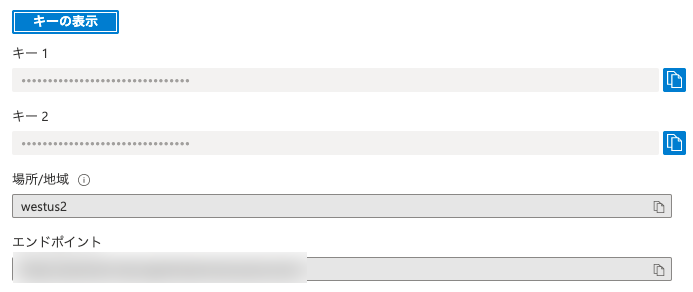

In [6]:
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

subscription_key = "{API Key}"
credentials = CognitiveServicesCredentials(subscription_key)

text_analytics_url = "{APIのエンドポイントURL}"
text_analytics = TextAnalyticsClient(endpoint=text_analytics_url, credentials=credentials)

In [30]:
documents = [
    {
        "id": "1",
        "language": "en",
        "text": mytext
    }
]

response = text_analytics.entities(documents=documents)

In [31]:
for document in response.documents:
    for entity in document.entities:
        pprint.pprint(entity.as_dict())

{'bing_id': '37181124-e096-403d-a455-576a61b83525',
 'matches': [{'length': 13,
              'offset': 0,
              'text': 'SAN FRANCISCO',
              'wikipedia_score': 0.16991371426775936}],
 'name': 'San Francisco',
 'type': 'Location',
 'wikipedia_id': 'San Francisco',
 'wikipedia_language': 'en',
 'wikipedia_url': 'https://en.wikipedia.org/wiki/San_Francisco'}
{'bing_id': '44615f38-159f-8476-17fb-f9f0ef482ff9',
 'matches': [{'length': 5,
              'offset': 16,
              'text': 'After',
              'wikipedia_score': 0.04428016463078621}],
 'name': 'After (2019 film)',
 'type': 'Other',
 'wikipedia_id': 'After (2019 film)',
 'wikipedia_language': 'en',
 'wikipedia_url': 'https://en.wikipedia.org/wiki/After_(2019_film)'}
{'bing_id': '4bc8f781-7083-d1a0-f781-9466e0eb62e7',
 'matches': [{'length': 8,
              'offset': 104,
              'text': 'Facebook',
              'wikipedia_score': 0.4486030317344518},
             {'length': 8,
              'offset'

In [32]:
# Let us clean up a little bit, and not print the whole lot of messy stuff it gives us?
for document in response.documents:
    print("Entities in this document: ")
    for entity in document.entities:
        if entity.type in ["Person", "Location", "Organization"]:
            print(entity.name, "\t", entity.type)
            if entity.wikipedia_url:
                print(entity.wikipedia_url)

Entities in this document: 
San Francisco 	 Location
https://en.wikipedia.org/wiki/San_Francisco
Facebook 	 Organization
https://en.wikipedia.org/wiki/Facebook
Thursday (band) 	 Person
https://en.wikipedia.org/wiki/Thursday_(band)
Alex Jones 	 Person
https://en.wikipedia.org/wiki/Alex_Jones
InfoWars 	 Organization
https://en.wikipedia.org/wiki/InfoWars
Louis Farrakhan 	 Person
https://en.wikipedia.org/wiki/Louis_Farrakhan
Silicon Valley 	 Location
https://en.wikipedia.org/wiki/Silicon_Valley
Instagram 	 Organization
https://en.wikipedia.org/wiki/Instagram
